## Linear Regression

To see the practical implementation of linear regression, I have taken the problem of finding the relationship between years of schooling and life expectancy. By analyzing real-world data, we can gain insights into how educational attainment affects health outcomes.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

life_expectancy=pd.read_csv('Life Expectancy Data.csv')
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
# Create dataframe with dependent and indepentend variables
data=pd.DataFrame({
    'Life expectancy': life_expectancy.iloc[:,3],
    'Schooling':life_expectancy.iloc[:,21]
})
data

,Life expectancy,Schooling
0,65.0,10.1
1,59.9,10.0
2,59.9,9.9
3,59.5,9.8
4,59.2,9.5
...,...,...
2933,44.3,9.2
2934,44.5,9.5
2935,44.8,10.0
2936,45.3,9.8


In [5]:
# Rename the columns
data.rename(columns={'Life expectancy': 'y', 'Schooling': 'X'}, inplace=True)

In [6]:
data.describe()

,y,X
count,2928.000000,2775.000000
mean,69.224932,11.992793
std,9.523867,3.358920
min,36.300000,0.000000
25%,63.100000,10.100000
50%,72.100000,12.300000
75%,75.700000,14.300000
max,89.000000,20.700000


In [7]:
data.corr()

,y,X
y,1.000000,0.751975
X,0.751975,1.000000


With a correlation of 0.751, performing linear regression will likely result in a model where 𝑋 strongly predicts 𝑦. This indicates that changes in 
𝑋 closely track changes in 𝑦, confirming a strong linear relationship.

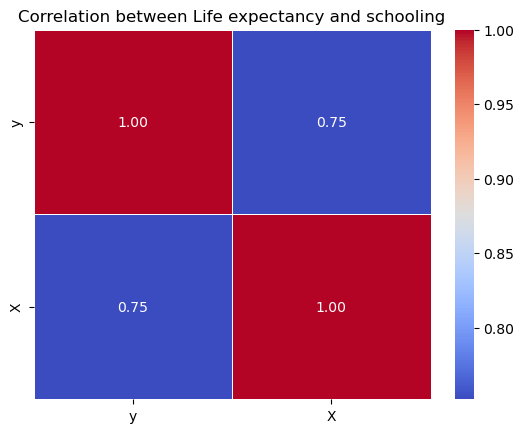

In [21]:
import seaborn as sns

corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation between Life expectancy and schooling')
plt.show()

The figure below shows the correlation between Life Expectancy (y) and Schooling (X). A correlation value of 0.75 indicates a strong positive relationship, meaning that as the number of years of schooling increases, life expectancy also tends to increase. This positive correlation suggests that education plays a significant role in improving health outcomes.

In [107]:
data.shape

(2938, 2)

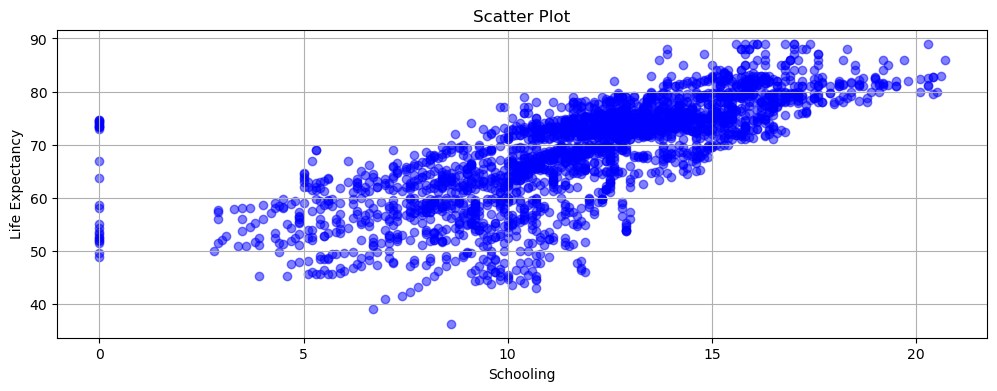

In [76]:
# Plotting X vs y
plt.figure(figsize=(12, 4))
plt.scatter(data['X'], data['y'], color='blue', alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.grid()
plt.show()

The scatter plot reveals that the data points are somewhat dispersed, particularly for populations with fewer than 10 years of schooling. This suggests that although schooling is a significant predictor of life expectancy, other factors likely influence life expectancy

### Preprocessing

In [28]:
data.isna().sum()

y     10
X    163
dtype: int64

In [30]:
data_cleaned = data.dropna()
X=data_cleaned[['X']]
y=data_cleaned['y']

We then split the dataset into training and testing sets using a 70-30 split. This means that 70% of the data will be used for training the model, while the remaining 30% will be used for testing its performance.

In [51]:
from sklearn.model_selection import train_test_split 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()

# Standardize the training and testing data for X
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)


In [53]:
# Model building
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(X_train,y_train)

LinearRegression()

We predict the output using the fitted model

In [58]:
predicted=le.predict(X_test)

In [59]:
predicted.shape

(831,)

In [60]:
# Inverse transform
X_train_original = scaler_X.inverse_transform(X_train)
X_test_original = scaler_X.inverse_transform(X_test)

We evaluate the model's performance using the R² score

In [71]:
from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(y_test,predicted)
mse=mean_squared_error(y_test,predicted)
print('R² Score: %f' % r2)
print('MSE: %f' % mse)

R² Score: 0.568007
MSE: 38.830706


Our model achieved an R² Score of 0.568. This indicates that approximately 56.8% of the variability in life expectancy can be explained by the schooling variable. While this shows a moderate correlation, there's still room for improvement, suggesting that other factors might also play a significant role in determining life expectancy.
The MSE of our model was 38.83. This metric quantifies the average squared difference between the predicted and actual life expectancy values. A lower MSE would indicate a better model fit, so we can look for ways to reduce this error through further feature engineering or model refinement.

In [62]:
# Check coefficients
coefficients = le.coef_
intercept = le.intercept_
print(coefficients,intercept)

[6.97719239] 69.5514713474445


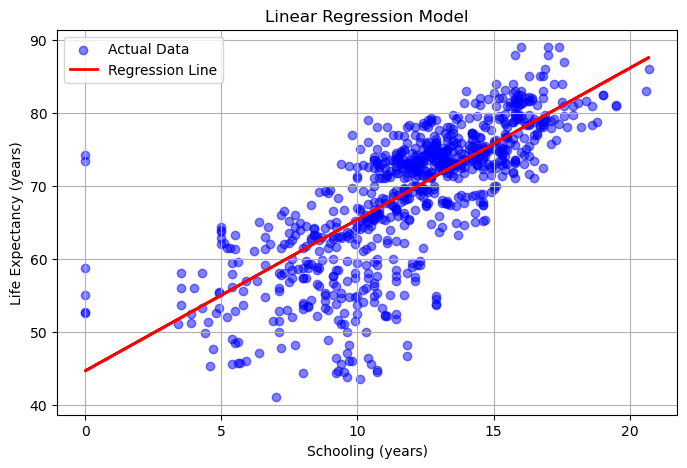

In [74]:
# Plotting the regression line
plt.figure(figsize=(8, 5))
plt.scatter(X_test_original, y_test, color='blue', label='Actual Data', alpha=0.5)
plt.plot(X_test_original, predicted, color='red', label='Regression Line', linewidth=2)
plt.title('Linear Regression Model')
plt.xlabel('Schooling (years)')
plt.ylabel('Life Expectancy (years)')
plt.legend()
plt.grid()
plt.show()

The red line represents the linear regression line, which is the best fit line through the data points. It is designed to minimize the distance between itself and the data points. The slope of the line is positive, reinforcing the positive relationship between schooling and life expectancy. There is noticeable deviation from the regression line for some lower and upper schooling values. This indicates that the linear model may not capture all the complexities or non-linearities in the relationship.

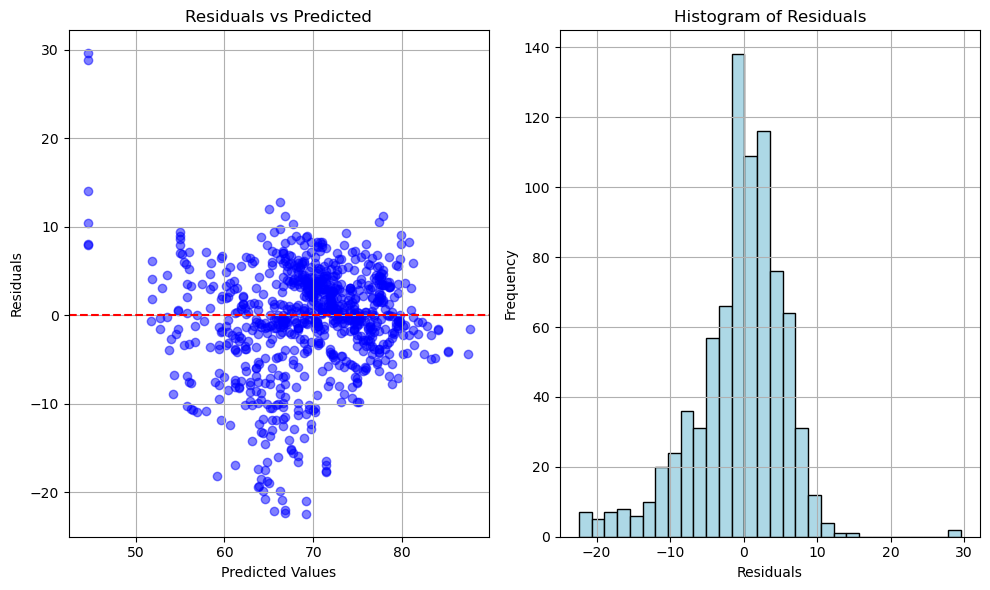

In [67]:
# Calculate residuals
residuals = y_test - predicted

plt.figure(figsize=(10, 6))

# Residual plot
plt.subplot(1, 2, 1)
plt.scatter(predicted, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()

# Histogram of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, color='lightblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()

plt.tight_layout()
plt.show()

The residual analysis for the linear model predicting life expectancy based on schooling shows that the residuals are fairly randomly scattered around zero, which suggests no major patterns in the errors. However, there is some clustering in the predicted values between 60 and 80, indicating that the model may not fully capture the relationship between the variables. The residuals also show no signs of severe heteroscedasticity (unequal spread of residuals across predictions). The histogram of residuals displays a roughly bell-shaped, symmetric distribution around zero, aligning well with the assumption of normality in linear regression, though some outliers and a slight skew are present.